# Prediction of Default of Credit Card Clients

The objective of this exercise is to predict the next month default of credit card clients. Default is when a cash loaner misses a payment. Knowing how to predict who will default is a key task in risk management as this prevent monkey losses.


## Initial Data Exploration

At this point my goal is to find the current state of the data. I will look for missing values or value that are outside the variable range. Then, I will also look at how the variables affect the default value.

Before going any further, below is the description of every variable; this information was provided by data holder ([kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset?select=UCI_Credit_Card.csv)).

> The data contains information on default payments, demographic factors, credit data, history of payments and bill statements of credit card clients in Taiwan from April 2005 to September 2005.   
>
>There are 25 variables:
>
>- ID: ID of each client
>- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
>- SEX: Gender (1=male, 2=female)
>- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
>- MARRIAGE: Marital status (1=married, 2=single, 3=others)
>- AGE: Age in years
>- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
>- PAY_2: Repayment status in August, 2005 (scale same as above)
>- PAY_3: Repayment status in July, 2005 (scale same as above)
>- PAY_4: Repayment status in June, 2005 (scale same as above)
>- PAY_5: Repayment status in May, 2005 (scale same as above)
>- PAY_6: Repayment status in April, 2005 (scale same as above)
>- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
>- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
>- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
>- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
>- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
>- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
>- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
>- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
>- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
>- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
>- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
>- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
>- default.payment.next.month: Default payment (1=yes, 0=no)   



In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df_credit = pd.read_csv("../dataset/UCI_Credit_Card.csv", index_col="ID")

In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

From `pandas.DataFrame.info()` method, we can see there are 24 variables, there are no missing values and that the data is composed by integers and floating point numbers. For some of the demographic variables, such as `SEX`, `EDUCATION` and `MARRIAGE`, I think converting them to categorical and performe an encoding might be more useful than having a range of interger values. Applying an encoding will split the possible options for each of these variables, and then each option will be either on or off. The `SEX` column, for instance, will be split into 2 columns one for `male` and the other for `female`, where `SEX = 1` will become `male = 1` and `female = 0`. This is a quick explanation of what might be done to the data further on.

In [4]:
df_credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


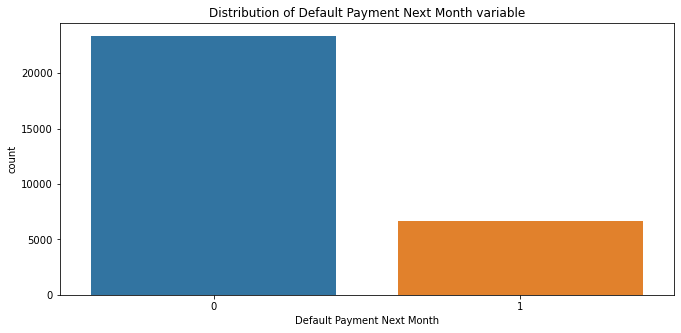

In [5]:
fig = plt.figure(figsize=(11,5))
gs = mpl.gridspec.GridSpec(1, 1, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax0 = sns.countplot(x='default.payment.next.month', data=df_credit)
ax0.set_title("Distribution of Default Payment Next Month variable")
ax0.set_xlabel("Default Payment Next Month")

fig.savefig("../images/default_payment_dist.png")
plt.show()

We can see that the amount of `default.payment.next.month = 1` is much smaller compared to the other classification `0`. This shows us that the vast majority of the clients are paying on time.

Then we can check if any of the variables have a straight forward correlation with the classification `default.payment.next.month`.

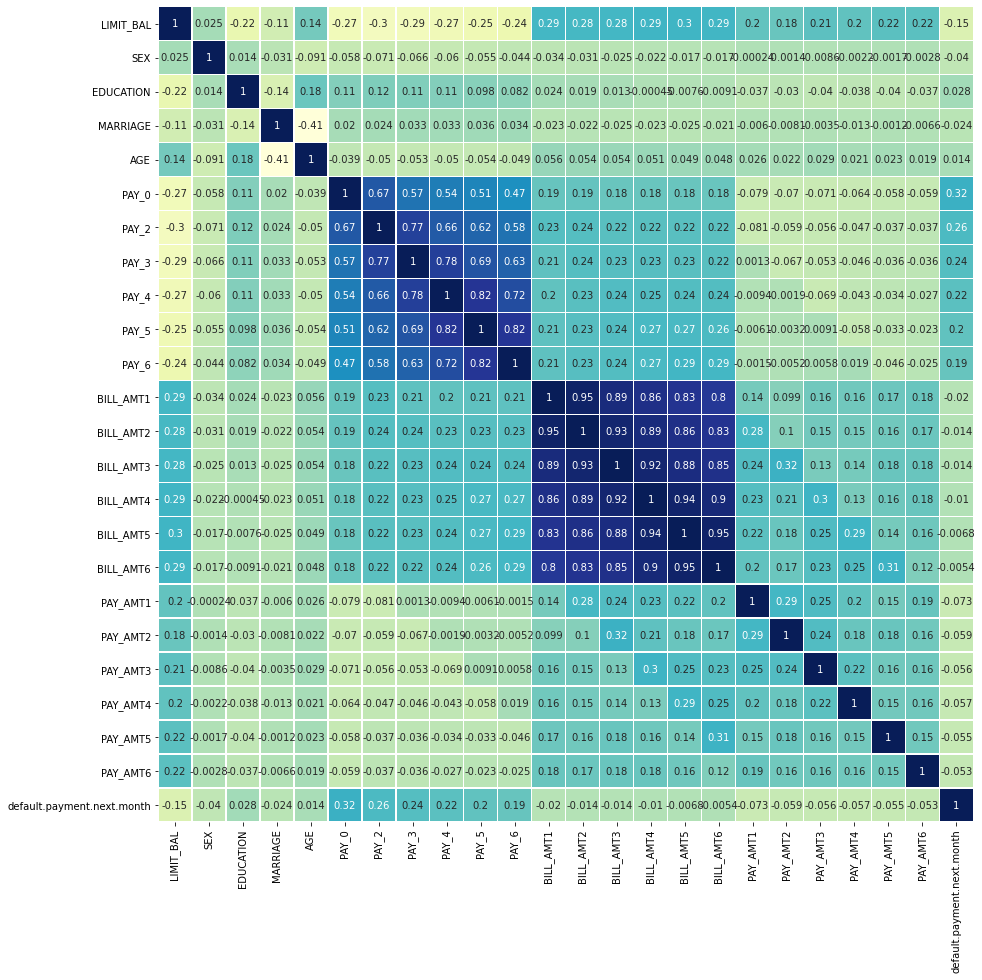

In [6]:
fig = plt.figure(figsize=(15,15))
gs = mpl.gridspec.GridSpec(1, 1, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax0 = sns.heatmap(df_credit.corr(), annot=True, 
                  square=True, linewidths=0.5, cmap='YlGnBu', cbar=False)

plt.show()

We can see there aren't any variable which straight forward shows a strong correlation with `default.payment.next.month`. 

This initial analysis of the data will be divided into 4 parts:
1. Demographic variables - `SEX`, `MARRIAGE`, `EDUCATION`, `AGE`.   
2. Repayment status - variables `PAY_X`.
3. Bill statement - variables `BILL_AMTX`.
4. Previous payment - variables `PAY_AMTX`.

### Demographic Variables

Before plotting the distribution of `default.payment.next.month` over the demographich variables, we can print the counts of each value for each of these variables.

In [7]:
print(df_credit['SEX'].value_counts())
print(df_credit['EDUCATION'].value_counts())
print(df_credit['MARRIAGE'].value_counts())
print(df_credit['AGE'].value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64


The data shows that:
- `SEX` has only two values as expected: `1` or `2`. 
- `EDUCATION` has value `0` which is out of spec (this has to be addressed somehow).
- `MARRIAGE` has value `0` which is out of spec (also to be addressed).
- `AGE` are all positive values as expected, and greater than or equal to `21`, which in some countries is considered to be the adulthood starting age.   

Beginning with `MARRIAGE` variable, where `0` was set will be considered as a typo or some variation of option `other = 3`. Thus wherever is a `0` will become a `3`.

In [8]:
df_credit.loc[df_credit['MARRIAGE']==0, 'MARRIAGE'] = 3

`EDUCATION` variable as two different values for the same description `unknown` and also `other` is not very clear. In this approach, as values `0`, `4`, `5` and `6` in total sum 468 cases which is around 1.5% of the data, I will take the decision to put all this cases into option `4`. 

In [9]:
df_credit.loc[(df_credit['EDUCATION']==5) | (df_credit['EDUCATION']==6) | (df_credit['EDUCATION']==0), 'EDUCATION'] = 4

In [10]:
print(df_credit['EDUCATION'].value_counts())
print(df_credit['MARRIAGE'].value_counts())

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


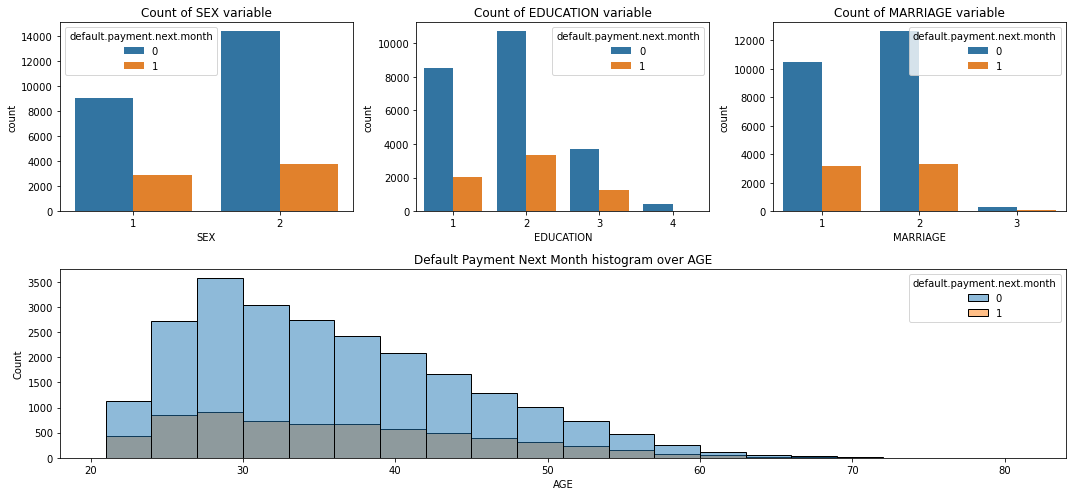

In [11]:
fig = plt.figure(figsize=(15,7))
gs = mpl.gridspec.GridSpec(2, 3, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax0 = sns.countplot(x='SEX', hue='default.payment.next.month', data=df_credit)
ax0.set_title('Count of SEX variable')

ax1 = fig.add_subplot(gs[0, 1])
ax1 = sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df_credit)
ax1.set_title('Count of EDUCATION variable')

ax2 = fig.add_subplot(gs[0, 2])
ax2 = sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=df_credit)
ax2.set_title('Count of MARRIAGE variable')

ax3 = fig.add_subplot(gs[1, :])
ax3 = sns.histplot(x='AGE', hue='default.payment.next.month', data=df_credit, binwidth=3)
ax3.set_title('Default Payment Next Month histogram over AGE')

plt.tight_layout()
plt.show()

From the figure above we can see how default payers are divided in relation to `SEX`, `MARRIAGE`, `EDUCATION` and `AGE`.


<function matplotlib.pyplot.show(close=None, block=None)>

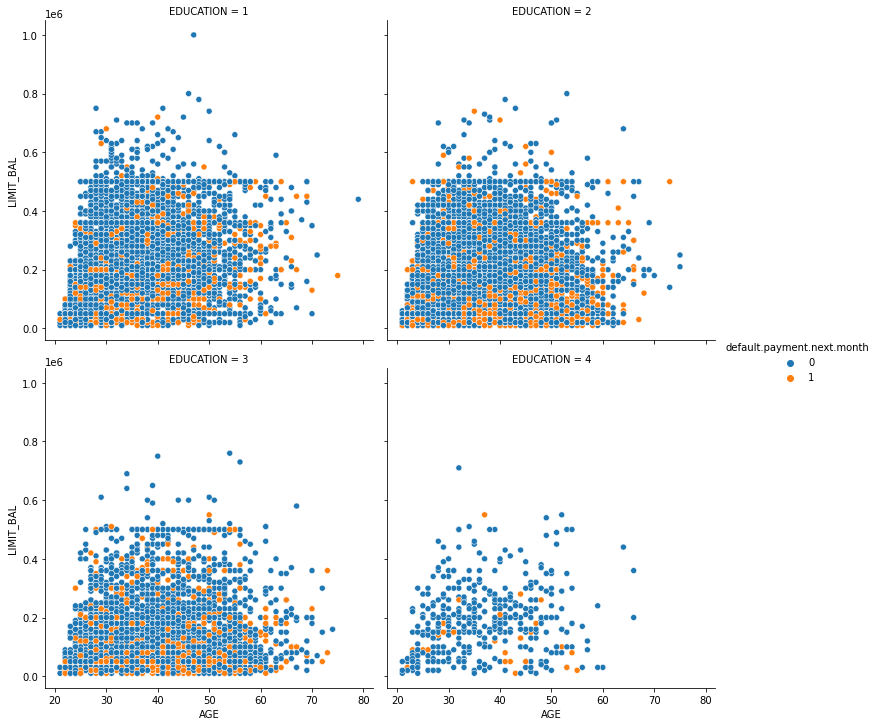

In [12]:
sns.relplot(x='AGE', y='LIMIT_BAL', data=df_credit, hue='default.payment.next.month', col='EDUCATION', col_wrap=2)

plt.savefig("../images/scatter_age_limit_education.png")
plt.show

The image above show us how the `LIMIT_BAL` is distributed over the `AGE` according to different `EDUCATION` levels. As the correlation map above has shown, there is not a clear trend to spot potential defaults. In case there was a trend somehow we would have seen some kind of clustering for different kind of default status.

### Repayment Status

Now looking at variables `PAY_X`, where `X = 1, 2, ..., 6`. We can do something similar to demographic variables, check out the amount of each option.

In [13]:
df_credit.rename({'PAY_0': 'PAY_1'}, axis=1, inplace=True)

In [14]:
cols_pay = ['PAY_' + str(i) for i in range(1,7)]
for pay in cols_pay:
    print(df_credit[pay].value_counts())

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


According to the variable description, `PAY_X` can have values `-1`, `1`, `2`, `3`, ..., `9`. The value counts show cases where `-2` and `0` were reported. My guess is that these options also refers to pay off debts, and then we could turn this values to `-1`, in order to have the data within the spec values. Maybe this kind of correction should have been done when data was recorded. Another option would be to use the data without this modification, and then apply the modification for comparison. Before actually doing anything with the data, we can plot the distribution so far.

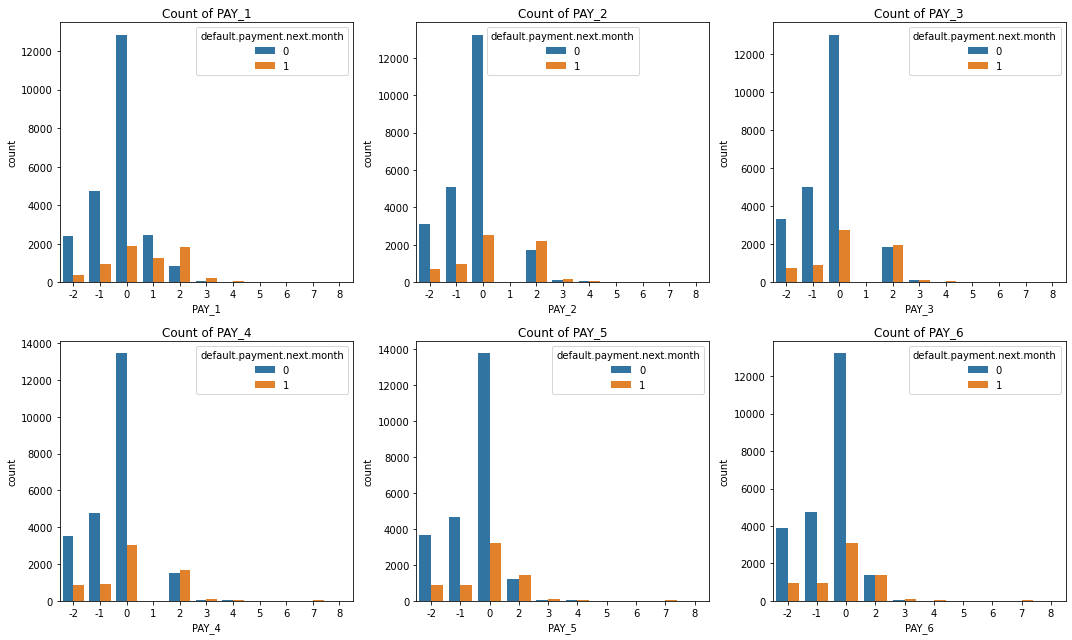

In [15]:
fig = plt.figure(figsize=(15,9))
gs = mpl.gridspec.GridSpec(2, 3, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax0 = sns.countplot(x='PAY_1', hue='default.payment.next.month', data=df_credit)
ax0.set_title('Count of PAY_1')

ax1 = fig.add_subplot(gs[0, 1])
ax1 = sns.countplot(x='PAY_2', hue='default.payment.next.month', data=df_credit)
ax1.set_title('Count of PAY_2')

ax2 = fig.add_subplot(gs[0, 2])
ax2 = sns.countplot(x='PAY_3', hue='default.payment.next.month', data=df_credit)
ax2.set_title('Count of PAY_3')

ax3 = fig.add_subplot(gs[1, 0])
ax3 = sns.countplot(x='PAY_4', hue='default.payment.next.month', data=df_credit)
ax3.set_title('Count of PAY_4')

ax4 = fig.add_subplot(gs[1, 1])
ax4 = sns.countplot(x='PAY_5', hue='default.payment.next.month', data=df_credit)
ax4.set_title('Count of PAY_5')

ax5 = fig.add_subplot(gs[1, 2])
ax5 = sns.countplot(x='PAY_6', hue='default.payment.next.month', data=df_credit)
ax5.set_title('Count of PAY_6')

fig.savefig("../images/pay_before_mod.png")
plt.tight_layout()
plt.show()

In [16]:
for pay in cols_pay:
    df_credit.loc[(df_credit[pay]==0) | (df_credit[pay]==-2), pay] = -1
    
for pay in cols_pay:
    print(df_credit[pay].value_counts())

-1    23182
 1     3688
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
-1    25562
 2     3927
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
-1    25787
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
-1    26490
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
-1    27032
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
-1    26921
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


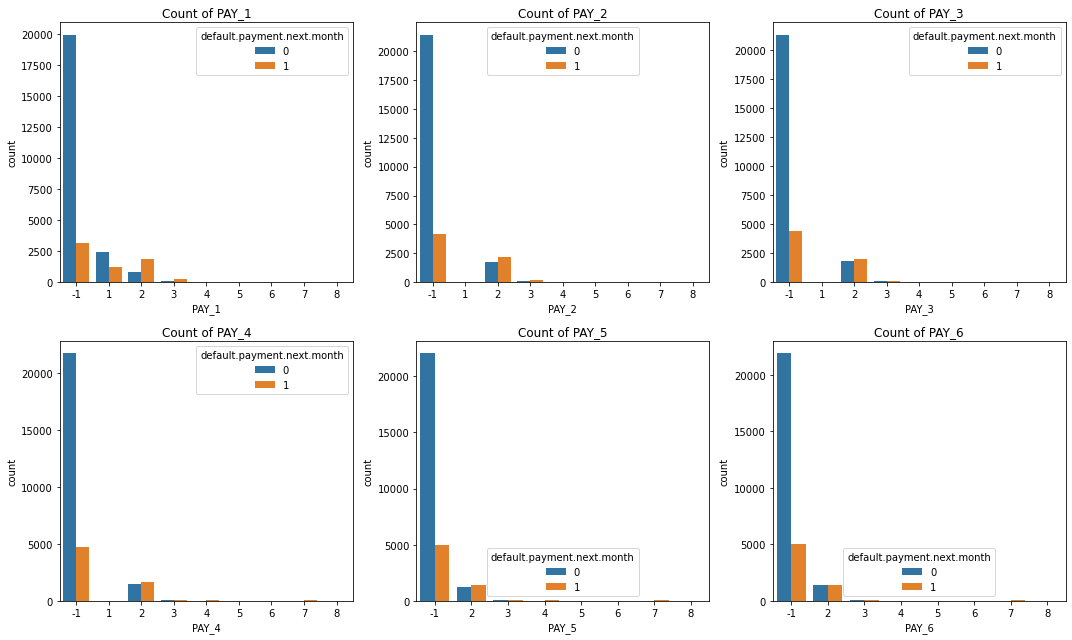

In [17]:
fig = plt.figure(figsize=(15,9))
gs = mpl.gridspec.GridSpec(2, 3, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax0 = sns.countplot(x='PAY_1', hue='default.payment.next.month', data=df_credit)
ax0.set_title('Count of PAY_1')

ax1 = fig.add_subplot(gs[0, 1])
ax1 = sns.countplot(x='PAY_2', hue='default.payment.next.month', data=df_credit)
ax1.set_title('Count of PAY_2')

ax2 = fig.add_subplot(gs[0, 2])
ax2 = sns.countplot(x='PAY_3', hue='default.payment.next.month', data=df_credit)
ax2.set_title('Count of PAY_3')

ax3 = fig.add_subplot(gs[1, 0])
ax3 = sns.countplot(x='PAY_4', hue='default.payment.next.month', data=df_credit)
ax3.set_title('Count of PAY_4')

ax4 = fig.add_subplot(gs[1, 1])
ax4 = sns.countplot(x='PAY_5', hue='default.payment.next.month', data=df_credit)
ax4.set_title('Count of PAY_5')

ax5 = fig.add_subplot(gs[1, 2])
ax5 = sns.countplot(x='PAY_6', hue='default.payment.next.month', data=df_credit)
ax5.set_title('Count of PAY_6')

fig.savefig("../images/pay_after_mod.png")
plt.tight_layout()
plt.show()

In this approach, I will make keep with `PAY_X` status modified to suit the variable specs according to what was reported by the problem information.

### Bill Statement and Previous Payment



In [29]:
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
cols_prev = ['PAY_AMT' + str(i) for i in range(1,7)]

bill_min, bill_max = np.min(df_credit[cols_bill].min()) - 10000, np.max(df_credit[cols_bill].max()) + 10000
prev_min, prev_max = np.min(df_credit[cols_prev].min()) - 100000, np.max(df_credit[cols_prev].max()) + 100000

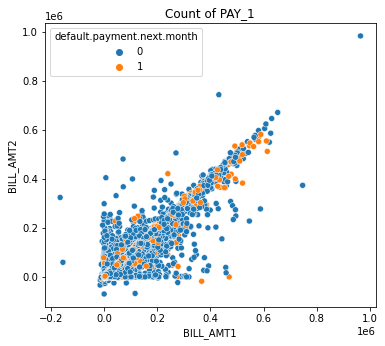

In [33]:
fig = plt.figure(figsize=(15,9))
gs = mpl.gridspec.GridSpec(2, 3, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax0 = sns.scatterplot(x='BILL_AMT1', y='BILL_AMT2', hue='default.payment.next.month', data=df_credit)
ax0.set_title('Count of PAY_1')
# ax0.set_xlim((bill_min, bill_max))
# ax0.set_ylim((prev_min, prev_max))

# ax1 = fig.add_subplot(gs[0, 1], sharex=ax0, sharey=ax0)
# ax1 = sns.scatterplot(x='BILL_AMT2', y='PAY_AMT2', hue='default.payment.next.month', data=df_credit)
# ax1.set_title('Count of PAY_2')

# ax2 = fig.add_subplot(gs[0, 2], sharex=ax0, sharey=ax0)
# ax2 = sns.scatterplot(x='BILL_AMT3', y='PAY_AMT3', hue='default.payment.next.month', data=df_credit)
# ax2.set_title('Count of PAY_3')

# ax3 = fig.add_subplot(gs[1, 0], sharex=ax0, sharey=ax0)
# ax3 = sns.scatterplot(x='BILL_AMT4', y='PAY_AMT4', hue='default.payment.next.month', data=df_credit)
# ax3.set_title('Count of PAY_4')

# ax4 = fig.add_subplot(gs[1, 1], sharex=ax0, sharey=ax0)
# ax4 = sns.scatterplot(x='BILL_AMT5', y='PAY_AMT5', hue='default.payment.next.month', data=df_credit)
# ax4.set_title('Count of PAY_5')

# ax5 = fig.add_subplot(gs[1, 2], sharex=ax0, sharey=ax0)
# ax5 = sns.scatterplot(x='BILL_AMT6', y='PAY_AMT6', hue='default.payment.next.month', data=df_credit)
ax5.set_title('Count of PAY_6')

# fig.savefig("../images/pay_after_mod.png")
plt.tight_layout()
plt.show()